In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
data=pd.read_csv("KNN_Data.csv",names=["X","Y","Lable"])[10:91]

In [25]:
def KNN_Classifer(Pred_data, data, k):
    data_set=data.iloc[:,0:-1].values
    labels=data.iloc[:,-1].values.reshape(len(data.iloc[:,-1]),-1)
    diff = np.tile(Pred_data, (data_set.shape[0], 1))-data_set
    distance = (np.sum(diff**2, axis=1))**0.5 
    sorted_indices = np.argsort(distance)

    map_label = {}     # Create dictionary
    for i in range(k):
        label = labels[sorted_indices[i]][0]
        map_label[label] = map_label.get(label, 0) + 1   

    max_num = 0
    for key, value in map_label.items():
        if value > max_num:
            max_num = value
            ans = key
    return ans

In [26]:
Pred_data=[5.7,2.8]
print(KNN_Classifer(Pred_data,data,int(len(data))))

1


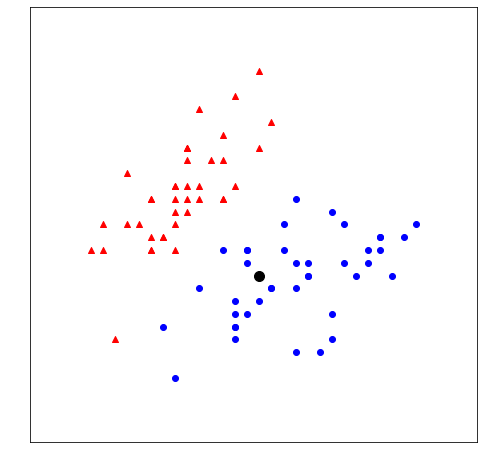

In [33]:
plt.figure(figsize=(8, 8))
plt.tick_params(colors='white')
Ans=KNN_Classifer(Pred_data,data, int(len(data)))
plt.scatter(list((data[data['Lable']==0]["X"]).values),list((data[data['Lable']==0]["Y"]).values),color='red',marker='^',label='y=0')
plt.scatter(list((data[data['Lable']==1]["X"]).values),list((data[data['Lable']==1]["Y"]).values),color='blue',marker='o',label='y=1')
plt.xlim(np.min(data["X"])-0.5, np.max(data["X"])+0.5)
plt.ylim(np.min(data["Y"])-0.5, np.max(data["Y"])+0.5)
if Ans==0:
    plt.scatter(Pred_data[0],Pred_data[1],color='black',marker='^',s=100)
if Ans==1:
    plt.scatter(Pred_data[0],Pred_data[1],color='black',marker='o',s=100)
plt.show()